# Customizing Ticks

includes:
+ ax.xaxis.set_major_locator(plt.NullLocator())
+ ax.yaxis.set_minor_formatter(plt.NullFormatter())

In [6]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

## Major and Minor Ticks

## Hiding Ticks or Labels

Perhaps the most common tick/label formatting operation is the act of hiding ticks or labels.
This can be done using ``plt.NullLocator()`` and ``plt.NullFormatter()``, as shown here:

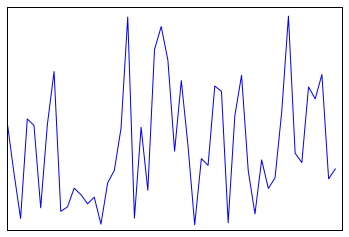

In [17]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())

ax.xaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

## Reducing or Increasing the Number of Ticks

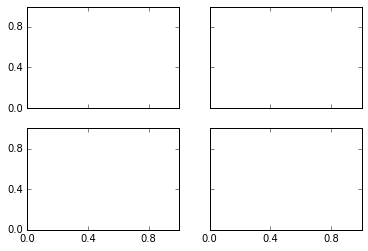

In [23]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))

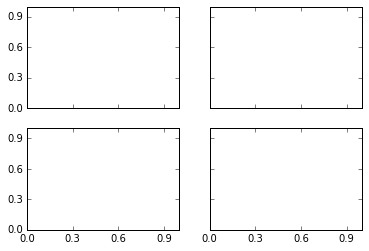

In [24]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MultipleLocator(0.3))
    axi.yaxis.set_major_locator(plt.MultipleLocator(0.3))

## Fancy Tick Formats

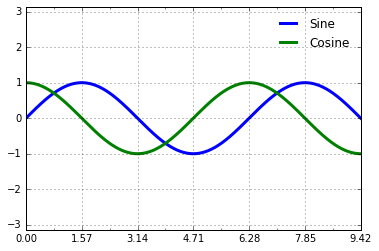

In [28]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))

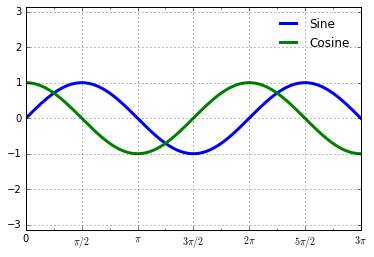

In [30]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

This is much better! Notice that we've made use of Matplotlib's LaTeX support, specified by enclosing the string within dollar signs. This is very convenient for display of mathematical symbols and formulae: in this case, ``"$\pi$"`` is rendered as the Greek character $\pi$.

The ``plt.FuncFormatter()`` offers extremely fine-grained control over the appearance of your plot ticks, and comes in very handy when preparing plots for presentation or publication.

## Summary of Formatters and Locators

We've mentioned a couple of the available formatters and locators.
We'll conclude this section by briefly listing all the built-in locator and formatter options. For more information on any of these, refer to the docstrings or to the Matplotlib online documentaion.
Each of the following is available in the ``plt`` namespace:

Locator class        | Description
---------------------|-------------
``NullLocator``      | No ticks
``FixedLocator``     | Tick locations are fixed
``IndexLocator``     | Locator for index plots (e.g., where x = range(len(y)))
``LinearLocator``    | Evenly spaced ticks from min to max
``LogLocator``       | Logarithmically ticks from min to max
``MultipleLocator``  | Ticks and range are a multiple of base
``MaxNLocator``      | Finds up to a max number of ticks at nice locations
``AutoLocator``      | (Default.) MaxNLocator with simple defaults.
``AutoMinorLocator`` | Locator for minor ticks

Formatter Class       | Description
----------------------|---------------
``NullFormatter``     | No labels on the ticks
``IndexFormatter``    | Set the strings from a list of labels
``FixedFormatter``    | Set the strings manually for the labels
``FuncFormatter``     | User-defined function sets the labels
``FormatStrFormatter``| Use a format string for each value
``ScalarFormatter``   | (Default.) Formatter for scalar values
``LogFormatter``      | Default formatter for log axes
